In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import os
from skimage import io
import numpy as np

Functions

In [25]:
# this function evaluates pixel accuract of the predicted masks
def pixel_acc(mask_dir, predict_dir):
    # Get the list of all file names in the mask directory
    file_list = os.listdir(mask_dir)

    # Initialize an empty list to store accuracy scores
    accuracy_scores = []

    # Loop through all files
    for file in file_list:
        # skip any non-PNG file
        if not file.endswith('.png'):
            continue
        # Create file paths
        mask_file = os.path.join(mask_dir, file)
        predict_file = os.path.join(predict_dir, file)

        # Load the images
        mask_img = io.imread(mask_file)
        predict_img = io.imread(predict_file)
        
        # Check max of images before normalization
        if np.max(mask_img) != 0:
            mask_img = mask_img / np.max(mask_img)
        if np.max(predict_img) != 0:
            predict_img = predict_img / np.max(predict_img)
        
        # Make sure that the mask and prediction are binary (0 and 1)
        mask_img = (mask_img > 0.5).astype(np.uint8)
        predict_img = (predict_img > 0.5).astype(np.uint8)
        
        # Calculate pixel accuracy
        correct_pixels = np.sum(mask_img == predict_img)
        total_pixels = mask_img.shape[0] * mask_img.shape[1]
        accuracy = correct_pixels / total_pixels

        # Append to accuracy scores list
        accuracy_scores.append(accuracy)

    # Create boxplot
    plt.boxplot(accuracy_scores)
    plt.title('Pixel Accuracy of UNET Predictions')
    plt.xlabel('UNET Model')
    plt.ylabel('Pixel Accuracy')
    plt.show()
    # print the mean pixel accuracy
    print(f"Mean pixel accuracy: {np.mean(accuracy_scores)}")


# this function evaluates Dice coefficient of the predicted masks
def dice_coef(mask_dir, predict_dir):
    # Get the list of all file names in the mask directory
    file_list = os.listdir(mask_dir)

    # Initialize an empty list to store Dice scores
    dice_scores = []

    # Loop through all files
    for file in file_list:
        # Skip any non-PNG files
        if not file.endswith('.png'):
            continue

        # Create file paths
        mask_file = os.path.join(mask_dir, file)
        predict_file = os.path.join(predict_dir, file)

        # Load the images
        mask_img = io.imread(mask_file)
        predict_img = io.imread(predict_file)
        
        # Check max of images before normalization
        if np.max(mask_img) != 0:
            mask_img = mask_img / np.max(mask_img)
        if np.max(predict_img) != 0:
            predict_img = predict_img / np.max(predict_img)
        
        # Make sure that the mask and prediction are binary (0 and 1)
        mask_img = (mask_img > 0.5).astype(np.uint8)
        predict_img = (predict_img > 0.5).astype(np.uint8)
        
        # Calculate Dice coefficient considering special cases
        if np.sum(mask_img) == 0 and np.sum(predict_img) == 0:
            dice = 1
        elif np.sum(mask_img) == 0 or np.sum(predict_img) == 0:
            dice = 0
        else:
            intersection = np.sum(predict_img * mask_img)
            dice = (2. * intersection) / (np.sum(predict_img) + np.sum(mask_img))

        # Append to Dice scores list
        dice_scores.append(dice)

    # Create boxplot
    plt.boxplot(dice_scores)
    plt.title('Dice Coefficients of UNET Predictions')
    plt.xlabel('UNET Model')
    plt.ylabel('Dice Coefficient')
    plt.show()
    # print the mean Dice coefficient
    print(f"Mean Dice coefficient: {np.mean(dice_scores)}")


# this function evaluates precision and recall of the predicted masks
def precision_recall(mask_dir, predict_dir):
    # Get the list of all file names in the mask directory
    file_list = os.listdir(mask_dir)

    # Initialize empty lists to store Precision and Recall scores
    precision_scores = []
    recall_scores = []

    # Loop through all files
    for file in file_list:
        # Skip any non-PNG files
        if not file.endswith('.png'):
            continue

        # Create file paths
        mask_file = os.path.join(mask_dir, file)
        predict_file = os.path.join(predict_dir, file)

        # Load the images
        mask_img = io.imread(mask_file)
        predict_img = io.imread(predict_file)
        
        # Check max of images before normalization
        if np.max(mask_img) != 0:
            mask_img = mask_img / np.max(mask_img)
        if np.max(predict_img) != 0:
            predict_img = predict_img / np.max(predict_img)
        
        # Make sure that the mask and prediction are binary (0 and 1)
        mask_img = (mask_img > 0.5).astype(np.uint8)
        predict_img = (predict_img > 0.5).astype(np.uint8)
        
        # Calculate True Positives (TP), False Positives (FP), and False Negatives (FN)
        TP = np.sum((predict_img == 1) & (mask_img == 1))
        FP = np.sum((predict_img == 1) & (mask_img == 0))
        FN = np.sum((predict_img == 0) & (mask_img == 1))
        
        # Calculate Precision and Recall scores and append to respective lists
        if (TP + FP) > 0:
            precision = TP / (TP + FP)
            precision_scores.append(precision)
        
        if (TP + FN) > 0:
            recall = TP / (TP + FN)
            recall_scores.append(recall)

    # Create boxplot for Precision scores
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.boxplot(precision_scores)
    plt.title('Precision of UNET Predictions')
    plt.xlabel('UNET Model')
    plt.ylabel('Precision')

    # Create boxplot for Recall scores
    plt.subplot(1,2,2)
    plt.boxplot(recall_scores)
    plt.title('Recall of UNET Predictions')
    plt.xlabel('UNET Model')
    plt.ylabel('Recall')

    plt.tight_layout()
    plt.show()  
    # print the mean Precision and Recall scores
    print(f"Mean Precision: {np.mean(precision_scores)}")
    print(f"Mean Recall: {np.mean(recall_scores)}")
      


Specify directories

In [12]:
# Define the directories
mask_dir = 'UNET/dataset/test/mask'
predict_dir = 'UNET/dataset/test/predict'

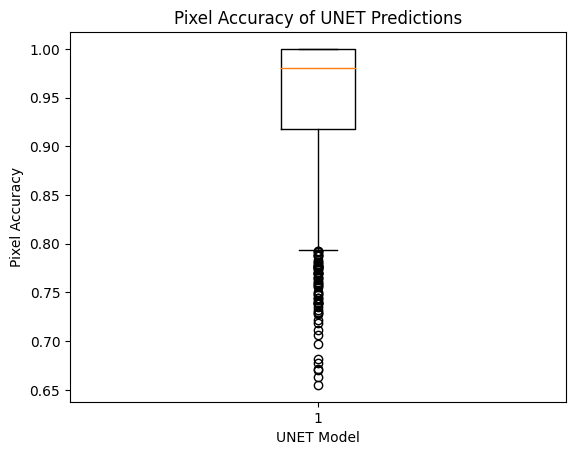

Mean pixel accuracy: 0.9495634814029585


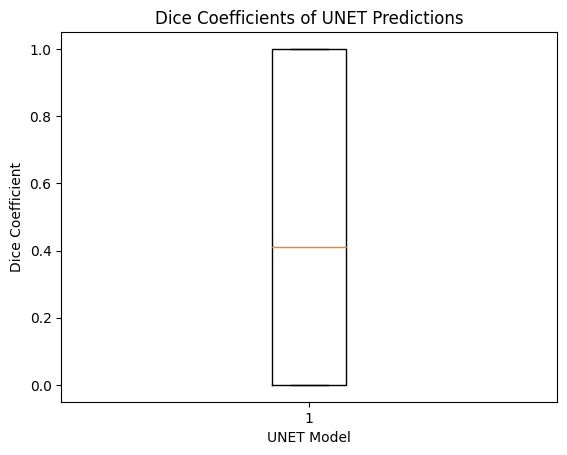

Mean Dice coefficient: 0.4554474310749652


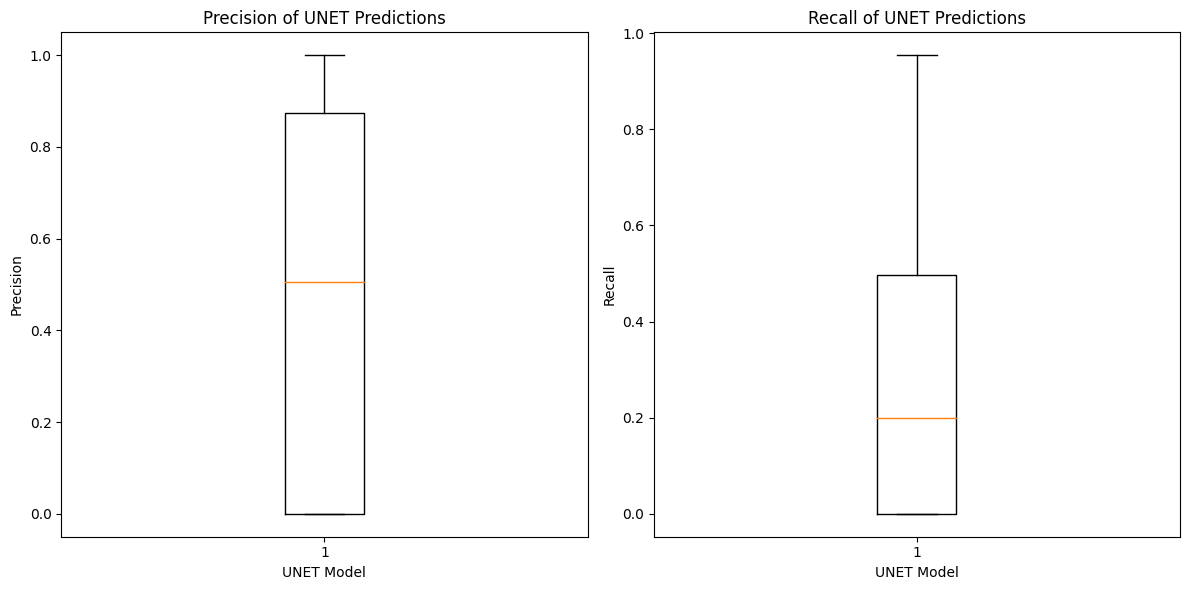

Mean Precision: 0.4533545921257551
Mean Recall: 0.27712158625022737


In [26]:
pixel_acc(mask_dir, predict_dir)
dice_coef(mask_dir, predict_dir)
precision_recall(mask_dir, predict_dir)

In [34]:
# Define the directories
mask_dir = '/Users/adrian/Desktop/cs-projects.nosync/multimodal-imaging/UNET/dataset_pt/test/mask'
predict_dir = '/Users/adrian/Desktop/cs-projects.nosync/multimodal-imaging/UNET/dataset_pt/test/predict_unet'

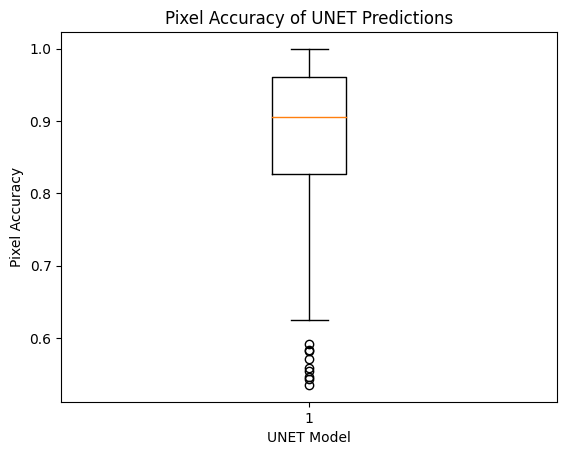

Mean pixel accuracy: 0.8822674114698127


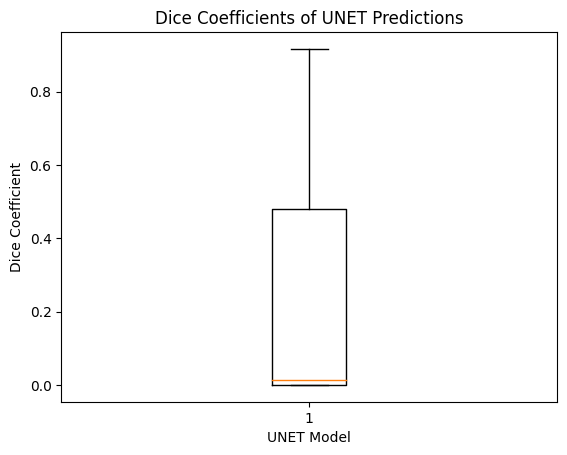

Mean Dice coefficient: 0.22605004460570974


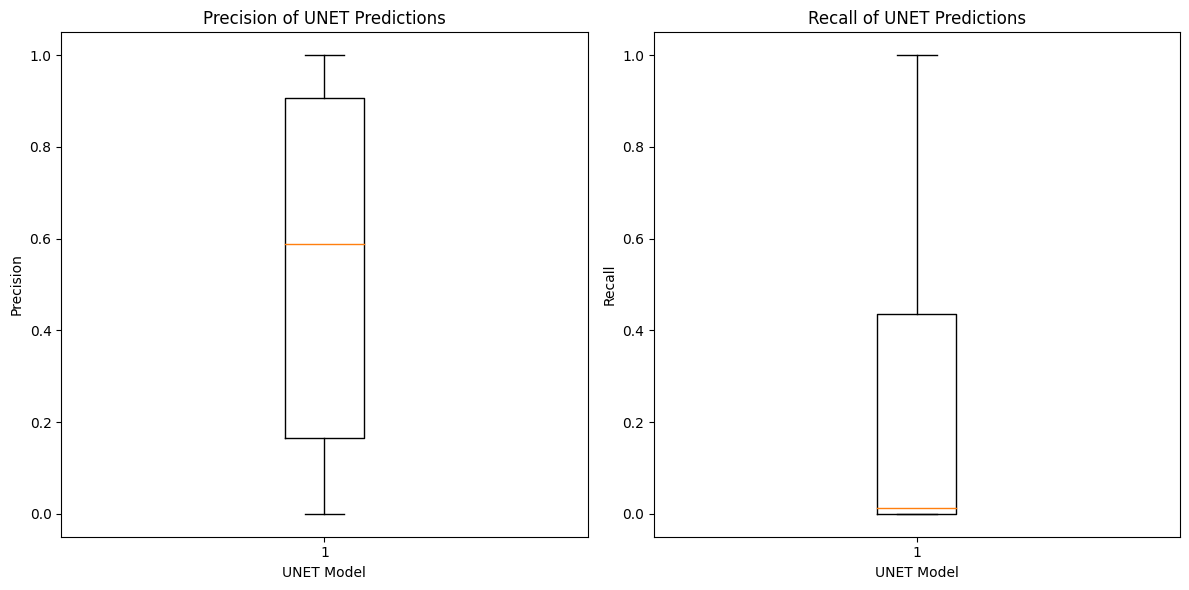

Mean Precision: 0.5431179177521361
Mean Recall: 0.22377427957142168


In [35]:
pixel_acc(mask_dir, predict_dir)
dice_coef(mask_dir, predict_dir)
precision_recall(mask_dir, predict_dir)

In [33]:
import os
from PIL import Image
import numpy as np

def count_masked_images(directory):
    # Get a list of all .png files in the directory
    png_files = [f for f in os.listdir(directory) if f.endswith('.png')]

    # Initialize the count of images with segments
    count = 0

    # Loop through each .png file
    for file in png_files:
        # Open the image file
        img = Image.open(os.path.join(directory, file))
        # Convert the image data to a numpy array
        img_data = np.array(img)
        # If there are any non-zero values in the image data, increment the count
        if np.any(img_data):
            count += 1

    return count

count_masked_images('dataset_mr/test/mask')

831